## Data Scraping 

### scraping indian urls

In [4]:
from selenium import webdriver
from selenium.webdriver import chrome 
from  selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
options=webdriver.ChromeOptions()
options.add_experimental_option("detach",True)
driver=webdriver.Chrome(options=options,service=Service(ChromeDriverManager().install()))
driver.get('https://www.faithcomesbyhearing.com/audio-bible-resources/recordings-database')
box=driver.find_element(By.XPATH,"//input[@class='default-input default-input--search w-input']")
box.send_keys('India')
box.send_keys(Keys.ENTER)


### saving indian urls data

In [6]:
import pickle 
with open('india.pkl', 'wb') as f:
    pickle.dump(india, f)

### indian urls data

In [16]:
import pickle 
with open('india.pkl','rb') as f:
     data=pickle.load(f)

In [17]:
data

['https://live.bible.is/bible/ADIBSI',
 'https://live.bible.is/bible/ORTWBT',
 'https://live.bible.is/bible/AHRDPI',
 'https://live.bible.is/bible/AHRWFW',
 'https://live.bible.is/bible/SCKIEA',
 'https://live.bible.is/bible/ASMDPI',
 'https://live.bible.is/bible/ASMSER',
 'https://live.bible.is/bible/ASMIEM',
 'https://live.bible.is/bible/AWAWTC',
 'https://live.bible.is/bible/AWAIBS',
 'https://live.bible.is/bible/BFYWIN',
 'https://live.bible.is/bible/BFZTLF',
 'https://live.bible.is/bible/BGQWBT',
 'https://live.bible.is/bible/LMNBSI',
 'https://live.bible.is/bible/BGDNLC',
 'https://live.bible.is/bible/BNGCIE',
 'https://live.bible.is/bible/BHDDPI',
 'https://live.bible.is/bible/BHAWIN']

## Audio 

### audio scraping and downloading 

In [28]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pickle
import time
import requests

def download_audio(url, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Check for HTTP errors

        with open(filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

        print(f"Audio downloaded successfully and saved as {filename}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while downloading the audio: {e}")

options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=options, service=Service(ChromeDriverManager().install()))

with open('india.pkl', 'rb') as f:
    data = pickle.load(f)

for idx, url in enumerate(data):
    print(idx)
    url = url + "/MAT/1"
    try:
        driver.get(url)
        time.sleep(2)
        box = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, "//div[@class='chapter justify']"))
        )
        video_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'video.audio-player'))
        )
        video_src = WebDriverWait(driver, 10).until(
            lambda d: video_element.get_attribute('src') and video_element.get_attribute('src') != url
        )
        actual_video_src = video_element.get_attribute('src')
        download_audio(actual_video_src, f"audio/{idx}.wav")
    except Exception as e:
        print(f"An error occurred: {e}")
    time.sleep(2)  # Add delay between requests to avoid overwhelming the server

# Close the WebDriver after the loop
driver.quit()


0
An error occurred: Message: 
Stacktrace:
	GetHandleVerifier [0x00D4B793+45827]
	(No symbol) [0x00CDDB74]
	(No symbol) [0x00BD150F]
	(No symbol) [0x00C120BC]
	(No symbol) [0x00C1216B]
	(No symbol) [0x00C4E0F2]
	(No symbol) [0x00C32E44]
	(No symbol) [0x00C4C034]
	(No symbol) [0x00C32B96]
	(No symbol) [0x00C06998]
	(No symbol) [0x00C0751D]
	GetHandleVerifier [0x010043C3+2899763]
	GetHandleVerifier [0x010577ED+3240797]
	GetHandleVerifier [0x00DD1264+593364]
	GetHandleVerifier [0x00DD818C+621820]
	(No symbol) [0x00CE6F54]
	(No symbol) [0x00CE3658]
	(No symbol) [0x00CE37F7]
	(No symbol) [0x00CD58AE]
	BaseThreadInitThunk [0x76657BA9+25]
	RtlInitializeExceptionChain [0x778EBE3B+107]
	RtlClearBits [0x778EBDBF+191]

1
An error occurred: Message: 
Stacktrace:
	GetHandleVerifier [0x00D4B793+45827]
	(No symbol) [0x00CDDB74]
	(No symbol) [0x00BD150F]
	(No symbol) [0x00C120BC]
	(No symbol) [0x00C1216B]
	(No symbol) [0x00C4E0F2]
	(No symbol) [0x00C32E44]
	(No symbol) [0x00C4C034]
	(No symbol) [0x00C

### data preprocessing on audio

In [29]:
! pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 260.1/260.1 kB 175.7 kB/s eta 0:00:00
     -------------------------------------- 75.1/75.1 kB 243.9 kB/s eta 0:00:00
     -------------------------------------- 63.0/63.0 kB 306.5 kB/s eta 0:00:00
     ------------------------------------ 184.6/184.6 kB 587.0 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import librosa

In [33]:
import os

In [34]:
audiofiles=os.listdir('audio')

In [35]:
audiofiles

['10.wav', '11.wav', '12.wav', '16.wav', '2.wav', '4.wav', '5.wav']

In [36]:
import matplotlib.pyplot as plt 

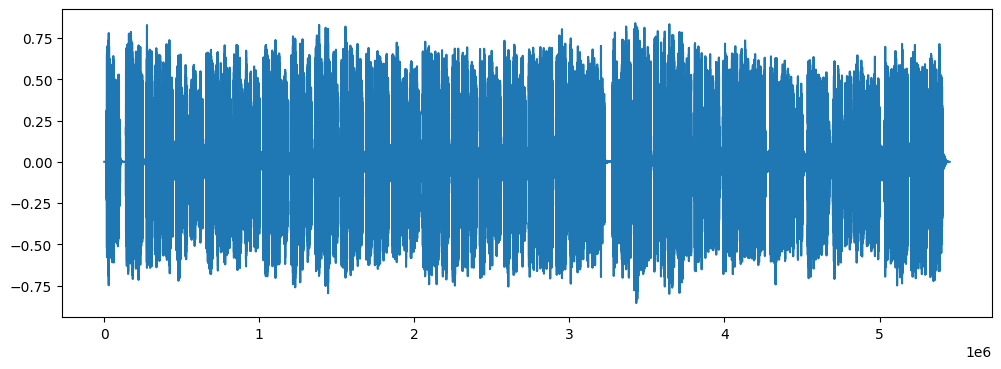

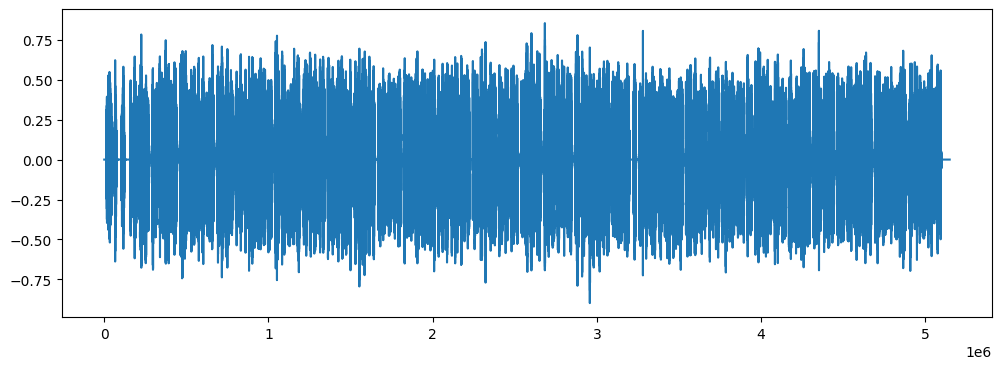

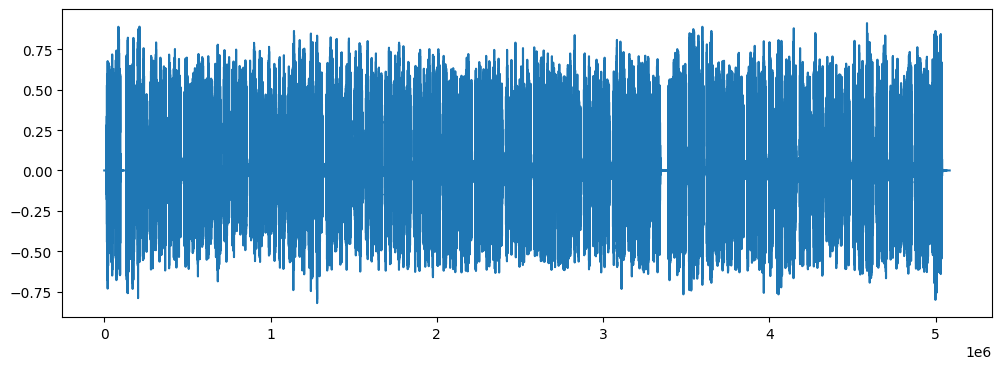

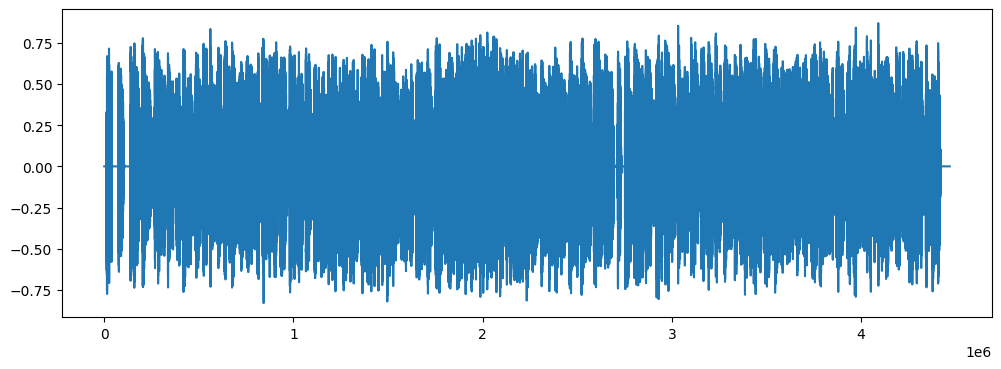

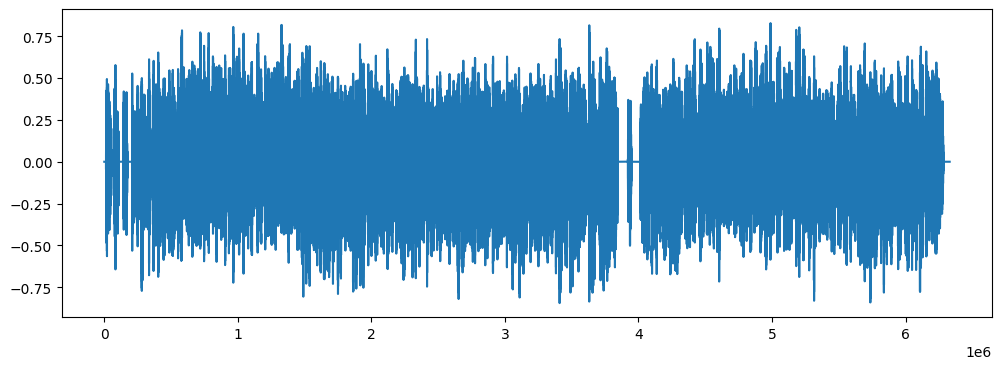

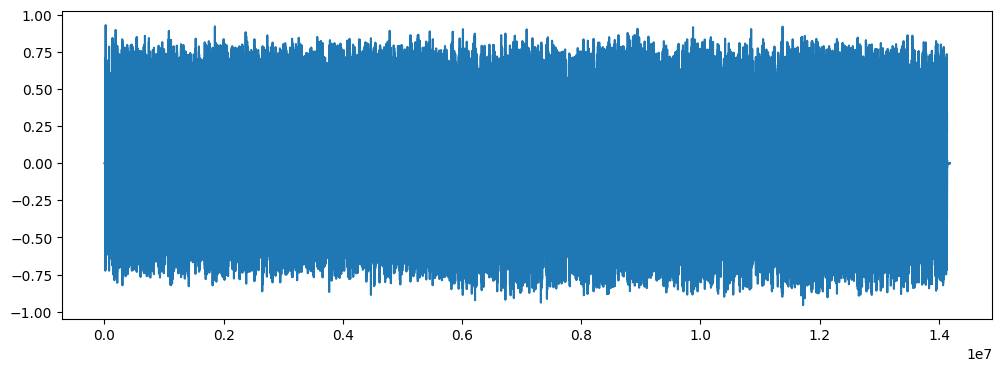

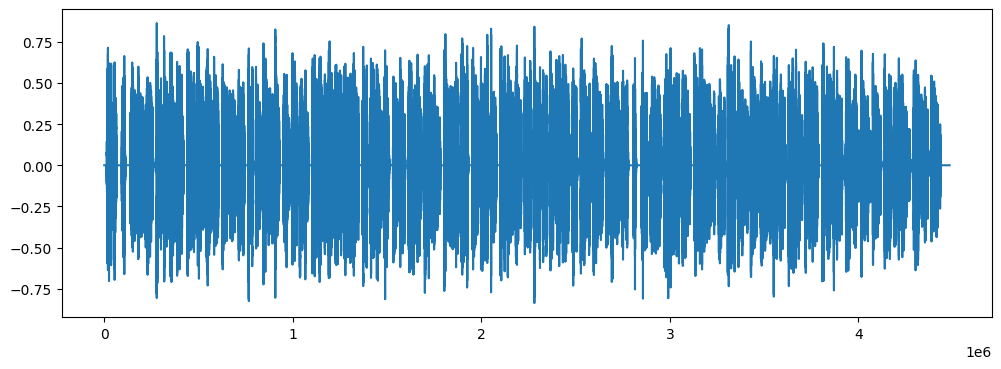

In [37]:
for  i in audiofiles:
     librosa_data,librosa_sample=librosa.load(f'audio/{i}')
     plt.figure(figsize=(12,4))
     plt.plot(librosa_data)


## Text

### Text Data Preprocessing 

In [43]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pickle
import time
import requests
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=options, service=Service(ChromeDriverManager().install()))

with open('india.pkl', 'rb') as f:
    data = pickle.load(f)
text_data=[]
for idx, url in enumerate(data):
    print(idx)
    url = url + "/MAT/1"
    try:
        driver.get(url)
        box= driver.find_element(By.XPATH,"//div[@class='chapter justify']")
        text_data.append(box.text)
    except Exception as e:
        print(f"An error occurred: {e}")
driver.quit()
import pickle 
with open('text_data.pkl', 'wb') as file:
    pickle.dump(text_data, file)

0
An error occurred: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//div[@class='chapter justify']"}
  (Session info: chrome=125.0.6422.60); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00FEB8E3+45827]
	(No symbol) [0x00F7DCC4]
	(No symbol) [0x00E7150F]
	(No symbol) [0x00EB20BC]
	(No symbol) [0x00EB216B]
	(No symbol) [0x00EEE0F2]
	(No symbol) [0x00ED2E44]
	(No symbol) [0x00EEC034]
	(No symbol) [0x00ED2B96]
	(No symbol) [0x00EA6998]
	(No symbol) [0x00EA751D]
	GetHandleVerifier [0x012A4513+2899763]
	GetHandleVerifier [0x012F793D+3240797]
	GetHandleVerifier [0x010713B4+593364]
	GetHandleVerifier [0x010782DC+621820]
	(No symbol) [0x00F870A4]
	(No symbol) [0x00F837A8]
	(No symbol) [0x00F83947]
	(No symbol) [0x00F759FE]
	BaseThreadInitThunk [0x76657BA9+25]
	RtlInitializeExceptionChain [0x778EBE3B+107]
	RtlClearBits [0x778EBD

In [48]:
import pickle

# Open the pickle file in binary read mode and load the data
with open('text_data.pkl', 'rb') as file:
    data = pickle.load(file)

print(data)

['1 1 हय येशु ख्रिस्त नि पूर्वजस्नी नावस्नी यादी शे. तो राजा दाविद ना वंश ना शे आणि जो अब्राहाम ना वंश शे. 2 अब्राहाम ना पोऱ्या इसहाक, इसहाक ना पोऱ्या याकोब, आणि याकोब ना पोऱ्या यहूदा, आणि तेना भाऊ हुयनात. 3 यहूदा ना पोऱ्या पेरेस आणि जेरह हुयनात, तामार एस्नी माय होती, आणि पेरेस ना पोऱ्या हेस्रोन, आणि हेस्रोन ना पोऱ्या अराम हुयना. 4 आणि अराम ना पोऱ्या अम्मीनादाब, आणि अम्मीनादाब ना पोऱ्या नहशोन, आणि नहशोन ना पोऱ्या सल्मोन हुयना. 5 सल्मोन ना पोऱ्या बवाज हुयना तेनी माय राहेब होती. आणि बवाज ना पोऱ्या ओबेद हुयना, आणि तेनी माय रूथ होती. राहेब आणि रूथ यहुदी नई होत्यात. आणि ओबेद ना पोऱ्या इशाय हुईना. 6 आणि इशाय ना पोऱ्या दाविद राजा, आणि दाविद ना पोऱ्या शलमोन, त्या स्त्री पासून उत्पन्न हुयना जी पयले उरीयानी बायको होती. 7 शलमोन ना पोऱ्या रहबाम, आणि रहबाम ना पोऱ्या अबिया, आणि अबिया ना पोऱ्या आसा हुयना. 8 आणि आसा ना पोऱ्या यहोशाफात, आणि यहोशाफात ना पोऱ्या योराम, आणि योराम ना पोऱ्या उज्जीया हुयना. 9 आणि उज्जीया ना पोऱ्या योताम, आणि योताम ना पोऱ्या आहाज, आणि आहाज ना पोऱ्या हिज्कीया हुयना. 10 आणि हिज्